In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy
import scipy.stats
from scipy.stats import moment, norm, logistic, f, chi2
from jupyterthemes import jtplot
jtplot.style()

## Параметры
(вариант 4)

1) $m=0$, $s^2=1$

2) Логистическое $LG(a,b)$, $a = 2$, $b = 3$; Фишера с $l$ и $m$ степенями свободы $(F_{m,l})$ : $l = 5$, $m = 3$.

In [2]:
#var 4
m = 0
s2 = 1

lg_a, lg_b = 2, 3
fisher_l, fisher_m = 5, 3

## Основные задания
1) Осуществить моделирование $n=10000$ реализаций случайной величины из нормального закона распределения $N(m,s^2)$ с заданными параметрами. Для моделирования воспользоваться алгоритмом, основанным на ЦПТ; (в качестве количества используемых слагаемых можно взять $N=48$, или $192$, или другое на свой выбор). Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями.

In [3]:
def normal(n, N=48, m=0, var=1):
    a = scipy.rand(N,n)
    x = np.sqrt(12/N)*(np.sum(a, axis=0)-N/2)*np.sqrt(var) + m
    return x

def print_mean_var(a, distr, *params):
    true_mean, true_var = distr.mean(*params), distr.var(*params)
    mean = np.sum(a)/len(a)
    var = np.var(a, ddof=1)
    # var2 = np.sqrt(np.sum((a-mean2)**2))/(len(a)-1)
    print(f'Mean: {mean:.3f}\nVariance: {var:.3f}')
    print(f'True mean: {true_mean:.3f}\nTrue variance: {true_var:.3f}')

a = normal(10000, m=m, var=s2)
print_mean_var(a, norm, m, s2)

Mean: 0.003
Variance: 1.007
True mean: 0.000
True variance: 1.000


2) Смоделировать $n=10000$ случайных величин из заданных абсолютно непрерывных распределений. Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями (если это возможно). Если математического ожидания не существует, то вычислить выборочное значение медианы и сравнить его с теоретическим.

In [4]:
def LG(n, a, b):
    y = scipy.rand(n)
    x = logistic.ppf(y, a, b)
    return x

def chisquare(n, m):
    x = np.sum(normal(m*n).reshape(m,n)**2, axis=0)
    return x

def fisher(n, l, m):
    x = (chisquare(n,l)/l)/(chisquare(n,m)/m)
    return x

print(f'Logistic (a={lg_a}, b={lg_b}):')
a = LG(10000, lg_a, lg_b)
print_mean_var(a, logistic, lg_a, lg_b)
print()
print(f'Fisher (l={fisher_l}, m={fisher_m}):')
a = fisher(10000, fisher_m, fisher_l)
print_mean_var(a, f, fisher_m, fisher_l)


Logistic (a=2, b=3):
Mean: 2.000
Variance: 29.973
True mean: 2.000
True variance: 29.609

Fisher (l=5, m=3):
Mean: 1.762
Variance: 14.911
True mean: 1.667
True variance: 11.111


## Дополнительные задания
1) а) Смоделировать $n=10000$ случайных величин из смеси двух распределений. Распределения взять из своего варианта задания 2, $\pi$ – вероятность выбора элемента из первого распределения.

In [5]:
def mix(n, pi):
    a = scipy.rand(n)
    x1 = LG(n, lg_a, lg_b)
    x2 = fisher(n, fisher_m, fisher_l)
    x1[a >= pi] = x2[a >= pi]
    return x1
pi = 0.3
a = mix(10000, pi)

б) Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями (найти в литературе или вывести самостоятельно формулы для нахождения математического ожидания и дисперсии смеси распределений).

In [6]:
class mixture:
    def mean(*params):
        distr1, distr2, params1, params2, pi = params
        return pi*distr1.mean(*params1)+(1-pi)*distr2.mean(*params2)
    def var(*params):
        distr1, distr2, params1, params2, pi = params
        mean1 = distr1.mean(*params1)
        mean2 = distr2.mean(*params2)
        return pi*distr1.var(*params1)+(1-pi)*distr2.var(*params2)+pi*(1-pi)*(mean1-mean2)**2

print_mean_var(a, mixture, logistic, f, (lg_a, lg_b), (fisher_m, fisher_l), pi)

Mean: 1.786
Variance: 13.449
True mean: 1.767
True variance: 16.684


2) а) Осуществить моделирование $n=10000$ реализаций случайной величины из стандартного нормального закона распределения $N(0,1)$, используя преобразование Бокса — Мюллера. 

б) вычислить коэффициент корреляции с лагом 1 для сгенерированной реализации.

In [7]:
def norm_bm(n):
    r = scipy.rand(n)
    phi = scipy.rand(n)
    z = np.cos(2*np.pi*phi)*np.sqrt(-2*np.log(r))
    return z

a = norm_bm(10000)
print_mean_var(a, norm, 0, 1)
corr_coef = pd.Series(a).autocorr()
corr_coef_manual = np.sum(a[:len(a)-1]*a[1:])/(len(a)-1)
print(f'Correlation coefficient: {corr_coef:.5}')
print(f'Correlation coefficient (manual): {corr_coef_manual:.5}')

Mean: 0.010
Variance: 1.020
True mean: 0.000
True variance: 1.000
Correlation coefficient: 0.0026048
Correlation coefficient (manual): 0.0027638


3) Для сгенерированных выборок из заданных распределений построить гистограммы, сравнить с теоретическими плотностями распределения вероятностей (на одном рисунке 2 графика: гистограмма и теоретическая плотность, всего 3 рисунка для каждого распределения). Сравнить «сближение» графиков при $n=100$, $n=1000$, $n=10000$.

In [9]:
def plot_hist_pmf(a, distr, *params, title=''):
    minimum = a.min()
    maximum = a.max()
    plt.figure(figsize=(10,5))
    l = int((maximum-minimum)*10)
    obs,_,_ = plt.hist(a, density=True, bins=l)
    x = np.linspace(minimum, maximum, num=l)
    exp = distr.pdf(x, *params)
    plt.plot(x, exp, c = 'red', zorder=5)
    plt.legend(['theoretical', 'empirical'])
    plt.title(title)
    plt.show()
    return obs, exp

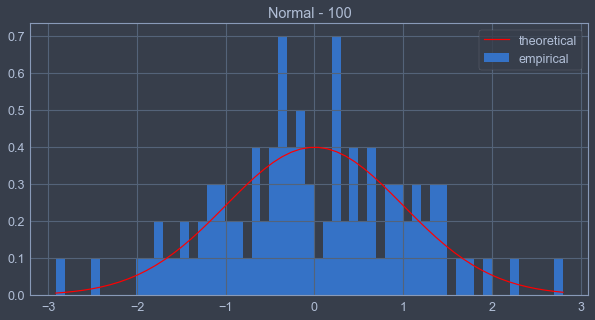

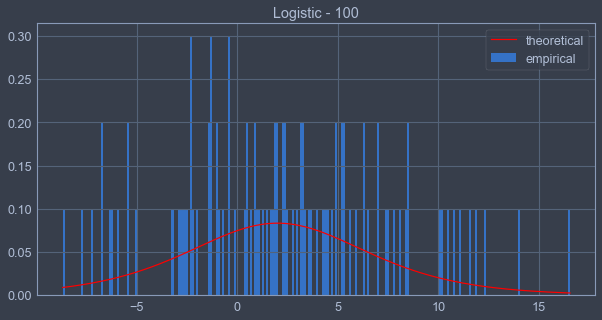

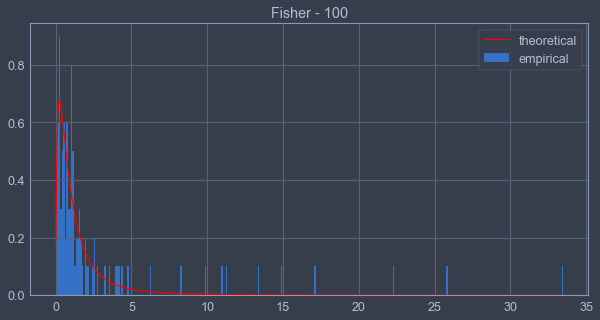

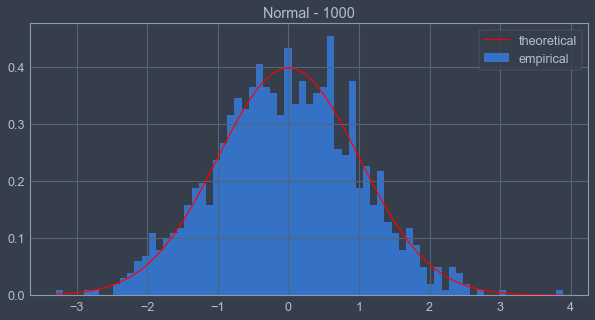

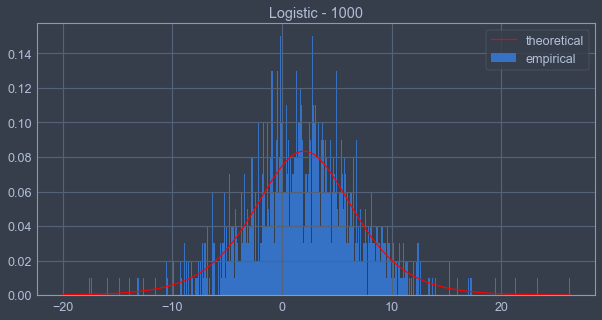

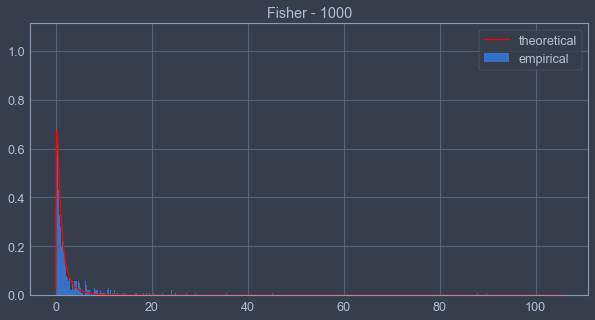

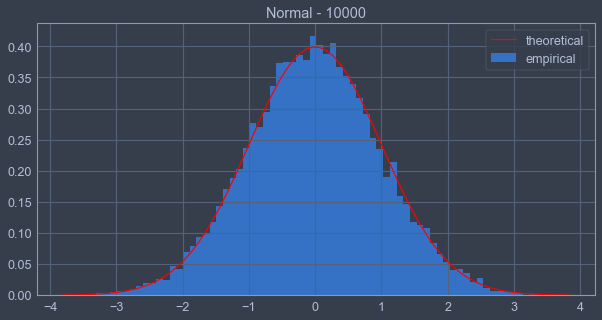

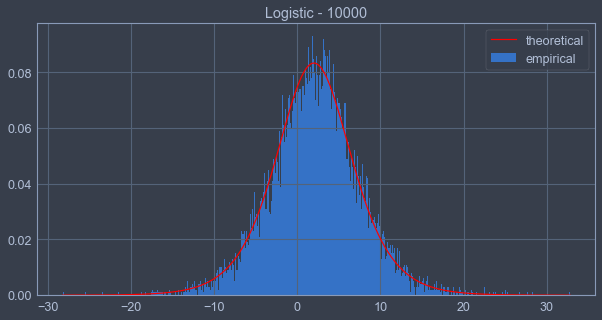

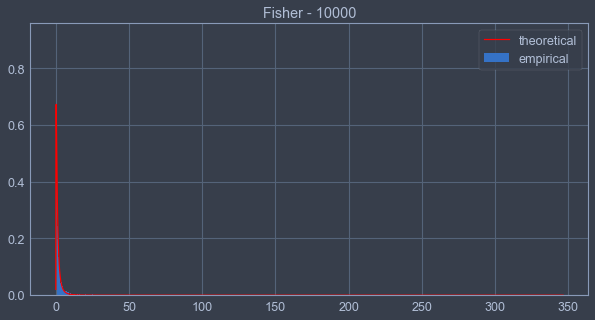

In [36]:
for n in [100,1000,10000]:
    plot_hist_pmf(normal(n,m=m,var=s2), norm, m, s2, title=f'Normal - {n}')
    plot_hist_pmf(LG(n, lg_a, lg_b), logistic, lg_a, lg_b, title=f'Logistic - {n}')
    plot_hist_pmf(fisher(n, lg_a, lg_b), f, fisher_m, fisher_l, title=f'Fisher - {n}')

4) Реализовать один или несколько тестов согласия. Применить каждый реализованный тест, хотя бы для одной сгенерированной выборки. Здесь же будут засчитываться и тесты на нормальность для проверки первой выборки. Главное условие, это должна быть ваша реализация и вы должны уметь объяснить, как тест работает.

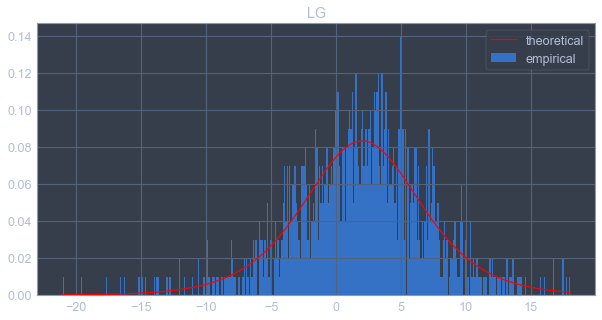

H0 is True
H0 is False
True
True


In [25]:
def empirical_cdf(X, x):
    n = len(X)
    if type(x) is np.ndarray:
        X = np.expand_dims(X, 0)
        X = np.repeat(X, len(x), axis=0)
        x = np.expand_dims(x, 1)
    return np.sum(X <= x)/n

def chisquare_test(obs, exp, p_threshold=0.05, to_print=True):
    df = len(obs) - 1
    x = np.sum((exp-obs)**2/exp)
    p_value = chi2.pdf(x, df)
    f = p_value < p_threshold
    if to_print: print('H0 is', f)
    return f

def kolmogorov(x, distr, *params, eps, to_print=True):
    kolomogorov_delta = {
        0.01: 1.63,
        0.05: 1.36,
        0.1: 1.22,
        0.2: 1.07
    }
    delta = kolomogorov_delta[eps]
    n = len(x)
    x_min, x_max = min(x), max(x)
    x_ = np.linspace(x_min, x_max, n)
    max_diff = np.max(np.abs(empirical_cdf(x, x_)-distr.cdf(x_, *params)))
    value = np.sqrt(n) * max_diff
    if to_print: print('H0 is', value < delta)
    return value < delta


def series(a, alpha=0.01):
    n = len(a)
    med = scipy.median(a)
    signs = np.sign(a - med)
    max_len = 0
    cur_len = 1
    number_of_series = 0
    prev_sign = signs[0]
    for i in range(1, len(signs)):
        if signs[i] == prev_sign:
            cur_len += 1
        else:
            if cur_len > max_len:
                max_len = cur_len
            number_of_series += 1
            cur_len = 0
        prev_sign = signs[i]
    T_k = max_len
    g = number_of_series
    if n < 20:
        c1 = g > int(0.5*(n+1-1.96*np.sqrt(n)))
        c2 = T_k < int(3.3*np.log10(n+1))
        return c1 and c2
    else:
        m = np.sum(a < med)
        res = (g - m - 0.5)/((m-1)*m / np.sqrt(2*m-1))
        return res < norm.ppf(1-alpha/2)


def series2(a):
    n = len(a)
    signs = []
    for i in range(len(a)-1):
        if a[i+1] != a[i]:
            signs.append(np.sign(a[i+1]-a[i]))
        else:
            signs.append(np.sign(a[i]))
    signs.append(np.sign(a[i+1]))
    max_len = 0
    cur_len = 1
    number_of_series = 0
    prev_sign = signs[0]
    for i in range(1, len(signs)):
        if signs[i] == prev_sign:
            cur_len += 1
        else:
            if cur_len > max_len:
                max_len = cur_len
            number_of_series += 1
            cur_len = 0
        prev_sign = signs[i]
    if n <= 26:
        T_0 = 5
    elif n <= 153:
        T_0 = 6
    elif n <= 1170:
        T_0 = 7
    else:
        raise ValueError("n <= 1170")
    T_k = max_len
    g = number_of_series
    c1 = g > int((2*n-1)/3-1.96*np.sqrt((16*n-29)/90))
    c2 = T_k < T_0
    return c1 and c2

a = LG(1000, lg_a, lg_b)
obs, exp = plot_hist_pmf(a, logistic, lg_a, lg_b, title='LG')
chisquare_test(obs,exp)
kolmogorov(a, logistic, lg_a, lg_b, eps=0.05)
print(series(a))
print(series2(a))

In [27]:
def table():
    eps = np.array([0.001, 0.05, 0.1])
    S1 = np.zeros_like(eps, dtype=int)
    S2 = np.zeros_like(eps, dtype=int)
    for i in range(1000):
        n = 1000
        a = LG(n, lg_a, lg_b)
        x_min, x_max = min(a), max(a)
        length = int(x_max - x_min + 1) * 10
        obs,_  = np.histogram(a, bins=length, density=True)
        x_ = np.linspace(x_min, x_max, length)
        exp = logistic.pdf(x_, lg_a, lg_b)
        for e in range(len(eps)):
            #if kolmogorov(a, logistic, lg_a, lg_b, eps= eps[e], to_print=False):
            if not chisquare_test(obs, exp, eps[e], False):
                S1[e] += 1
        a = fisher(n, fisher_m, fisher_l)
        x_min, x_max = min(a), max(a)
        obs,_ = np.histogram(a, bins=length, density=True)
        x_ = np.linspace(x_min, x_max, length)
        for e in range(len(eps)):
            #if kolmogorov(a, logistic, lg_a, lg_b, eps= eps[e], to_print=False):
            if not chisquare_test(obs, exp, eps[e], False):
                S2[e] += 1
        if i % 100 == 0: print(i)
    t = pd.DataFrame(data={'eps':eps,'S1':S1,'S2':S2})
    return t

table()

0
100
200
300
400
500
600
700
800
900


,eps,S1,S2
0,0.001,0,0
1,0.050,0,0
2,0.100,0,0
